## Image Classification
***Using simple ANN and CNN***   
In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below.
<img src="small_images.jpg" />

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.metrics import confusion_matrix , classification_report

Checking GPU availability

In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
tf.test.is_built_with_cuda()

True

### Load the dataset

In [5]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_train[:4]

array([[6],
       [9],
       [9],
       [4]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. So, convert this to 1D array.

In [9]:
y_train = y_train.reshape(-1, )
y_test = y_test.reshape(-1, )
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [11]:
classes[y_train[3]]

'deer'

### Normalizing the training data
Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [12]:
X_train = X_train/255
X_test = X_test/255

Plot some images to see what they are

In [13]:
def plot_sample(X, y, index):
    plt.figure(figsize=(10, 1))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

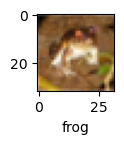

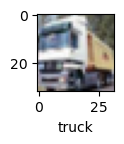

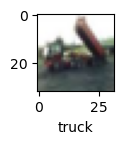

In [14]:
for i in range(3):
    plot_sample(X_train, y_train, i)

### Build simple ANN for image classification

In [15]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics='accuracy')


In [16]:
%%timeit -n1 -r1

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 16s 9ms/step - loss: 1.8113 - accuracy: 0.3527
Epoch 2/5
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6239 - accuracy: 0.4259
Epoch 3/5
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5421 - accuracy: 0.4543
Epoch 4/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4842 - accuracy: 0.4767
Epoch 5/5
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4335 - accuracy: 0.4953
1min 9s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


**Using simple ANN, At the end of 5 epochs, accuracy is at around 49%**

In [17]:
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('Classification Report:')
print(classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.29      0.41      1000
           1       0.64      0.59      0.61      1000
           2       0.46      0.14      0.21      1000
           3       0.45      0.17      0.25      1000
           4       0.26      0.73      0.38      1000
           5       0.42      0.30      0.35      1000
           6       0.48      0.56      0.52      1000
           7       0.52      0.55      0.54      1000
           8       0.47      0.74      0.58      1000
           9       0.66      0.41      0.51      1000

    accuracy                           0.45     10000
   macro avg       0.51      0.45      0.44     10000
weighted avg       0.51      0.45      0.44     10000



### Build a CNN for image classification

In [18]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [19]:
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:
%%timeit -n1 -r1

cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 19s 8ms/step - loss: 1.4111 - accuracy: 0.4948
Epoch 2/5
1563/1563 [==============================] - 13s 9ms/step - loss: 1.0716 - accuracy: 0.6255
Epoch 3/5
1563/1563 [==============================] - 15s 10ms/step - loss: 0.9392 - accuracy: 0.6748
Epoch 4/5
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8534 - accuracy: 0.7026
Epoch 5/5
1563/1563 [==============================] - 15s 10ms/step - loss: 0.7780 - accuracy: 0.7307
1min 18s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [21]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.8835 - accuracy: 0.7016


[0.8835411071777344, 0.7016000151634216]

In [22]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('Classification Report:')
print(classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1000
           1       0.79      0.83      0.81      1000
           2       0.61      0.55      0.58      1000
           3       0.52      0.54      0.53      1000
           4       0.65      0.66      0.65      1000
           5       0.65      0.55      0.60      1000
           6       0.74      0.82      0.77      1000
           7       0.79      0.70      0.74      1000
           8       0.73      0.87      0.79      1000
           9       0.79      0.76      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



'airplane'

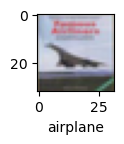

In [23]:
plot_sample(X_test, y_test, 3)
classes[y_pred_classes[3]]